## Stock Market Prediction And Forecasting Using Stacked LSTM

### Data Collection and Data Pre-processing

In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = pdr.get_data_tiingo('GOOG', api_key="0cbcc4611bf0fa149680e26d6c3e0f652669c2e8")

In [3]:
dataset.to_csv('GOOG.csv')
dataset=pd.read_csv('GOOG.csv')

In [4]:
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-05-05 00:00:00+00:00,701.43,702.3199,695.7200,697.70,1683507,701.43,702.3199,695.7200,697.70,1683507,0.0,1.0
1,GOOG,2016-05-06 00:00:00+00:00,711.12,711.8600,698.1067,698.38,1829291,711.12,711.8600,698.1067,698.38,1829291,0.0,1.0
2,GOOG,2016-05-09 00:00:00+00:00,712.90,718.7100,710.0000,712.00,1510289,712.90,718.7100,710.0000,712.00,1510289,0.0,1.0
3,GOOG,2016-05-10 00:00:00+00:00,723.18,723.5000,715.7200,716.75,1569591,723.18,723.5000,715.7200,716.75,1569591,0.0,1.0
4,GOOG,2016-05-11 00:00:00+00:00,715.29,724.4800,712.8000,723.41,1692063,715.29,724.4800,712.8000,723.41,1692063,0.0,1.0


In [5]:
dataset.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2021-04-27 00:00:00+00:00,2307.12,2337.450,2304.27,2336.000,1598583,2307.12,2337.450,2304.27,2336.000,1598583,0.0,1.0
1253,GOOG,2021-04-28 00:00:00+00:00,2379.91,2452.378,2374.85,2407.145,2986439,2379.91,2452.378,2374.85,2407.145,2986439,0.0,1.0
1254,GOOG,2021-04-29 00:00:00+00:00,2429.89,2436.520,2402.28,2410.330,1977677,2429.89,2436.520,2402.28,2410.330,1977677,0.0,1.0
1255,GOOG,2021-04-30 00:00:00+00:00,2410.12,2427.140,2402.16,2404.490,1957130,2410.12,2427.140,2402.16,2404.490,1957130,0.0,1.0
1256,GOOG,2021-05-03 00:00:00+00:00,2395.17,2419.700,2384.50,2402.720,1689389,2395.17,2419.700,2384.50,2402.720,1689389,0.0,1.0


In [6]:
len(dataset)

1257

In [7]:
dataset1=dataset.reset_index()['open']

In [8]:
dataset1

0        697.700
1        698.380
2        712.000
3        716.750
4        723.410
          ...   
1252    2336.000
1253    2407.145
1254    2410.330
1255    2404.490
1256    2402.720
Name: open, Length: 1257, dtype: float64

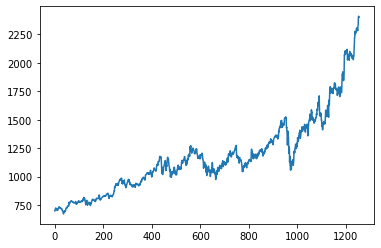

In [9]:
plt.plot(dataset1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset1=scaler.fit_transform(np.array(dataset1).reshape(-1,1))

In [11]:
print(dataset1)

[[0.01535074]
 [0.01574169]
 [0.0235723 ]
 ...
 [1.        ]
 [0.99664239]
 [0.99562475]]


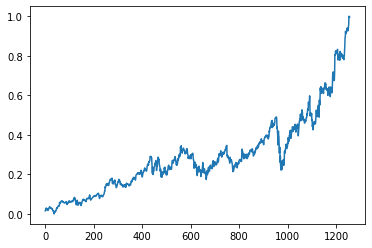

In [12]:
plt.plot(dataset1)

In [13]:
##splitting dataset into train and test split
training_size=int(len(dataset1)*0.75)
test_size=len(dataset1)-training_size
train_set,test_set=dataset1[0:training_size,:],dataset1[training_size:len(dataset1),:1]

In [14]:
training_size,test_size

(942, 315)

In [15]:
train_set

array([[0.01535074],
       [0.01574169],
       [0.0235723 ],
       [0.02630323],
       [0.03013229],
       [0.02648146],
       [0.02353205],
       [0.02192223],
       [0.02586628],
       [0.01878309],
       [0.01802993],
       [0.01760448],
       [0.02042741],
       [0.02061713],
       [0.02860872],
       [0.02982183],
       [0.03047725],
       [0.03492149],
       [0.03652556],
       [0.03535844],
       [0.03350141],
       [0.03099469],
       [0.02807978],
       [0.03044851],
       [0.02982183],
       [0.02786705],
       [0.02616525],
       [0.026148  ],
       [0.02759683],
       [0.02524535],
       [0.02164627],
       [0.01596592],
       [0.01575319],
       [0.01613265],
       [0.015207  ],
       [0.00239747],
       [0.        ],
       [0.00458222],
       [0.00689921],
       [0.0083193 ],
       [0.0121886 ],
       [0.01440785],
       [0.01091225],
       [0.01556921],
       [0.01638562],
       [0.02130131],
       [0.02766583],
       [0.030

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, step_time=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-step_time-1):
		a = dataset[i:(i+step_time), 0]   #i=0, 0,1,2,3-----104    105
		dataX.append(a)
		dataY.append(dataset[i + step_time, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
step_time = 105
X_train, y_train = create_dataset(train_set, step_time)
X_test, y_test = create_dataset(test_set, step_time)

In [18]:
print(X_train.shape), print(y_train.shape)

(836, 105)
(836,)


(None, None)

In [19]:
print(X_test.shape), print(y_test.shape)

(209, 105)
(209,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Stacked LSTM model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [22]:
# Initializing the Neural Network based on LSTM
model=Sequential()

# Adding 1st LSTM layer
model.add(LSTM(64,return_sequences=True,input_shape=(105,1)))

# Adding 2nd LSTM layer
model.add(LSTM(32,return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105, 64)           16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=105,batch_size=70,verbose=1)

Epoch 1/105
12/12 [==============================] - 9s 303ms/step - loss: 0.0248 - val_loss: 0.0336
Epoch 2/105
12/12 [==============================] - 2s 176ms/step - loss: 0.0024 - val_loss: 0.0220
Epoch 3/105
12/12 [==============================] - 2s 178ms/step - loss: 0.0014 - val_loss: 0.0229
Epoch 4/105
12/12 [==============================] - 2s 177ms/step - loss: 8.6331e-04 - val_loss: 0.0044
Epoch 5/105
12/12 [==============================] - 2s 171ms/step - loss: 5.4740e-04 - val_loss: 0.0031
Epoch 6/105
12/12 [==============================] - 2s 183ms/step - loss: 3.5525e-04 - val_loss: 0.0018
Epoch 7/105
12/12 [==============================] - 2s 177ms/step - loss: 3.7172e-04 - val_loss: 0.0019
Epoch 8/105
12/12 [==============================] - 2s 164ms/step - loss: 3.6345e-04 - val_loss: 0.0019
Epoch 9/105
12/12 [==============================] - 2s 163ms/step - loss: 3.6039e-04 - val_loss: 0.0019
Epoch 10/105
12/12 [==============================] - 2s 167ms/step

12/12 [==============================] - 2s 183ms/step - loss: 2.1189e-04 - val_loss: 9.4089e-04
Epoch 79/105
12/12 [==============================] - 2s 181ms/step - loss: 2.2275e-04 - val_loss: 9.0577e-04
Epoch 80/105
12/12 [==============================] - 2s 181ms/step - loss: 2.1936e-04 - val_loss: 7.6503e-04
Epoch 81/105
12/12 [==============================] - 2s 201ms/step - loss: 2.1939e-04 - val_loss: 9.8705e-04
Epoch 82/105
12/12 [==============================] - 2s 186ms/step - loss: 2.0819e-04 - val_loss: 8.1589e-04
Epoch 83/105
12/12 [==============================] - 2s 197ms/step - loss: 2.1608e-04 - val_loss: 9.7421e-04
Epoch 84/105
12/12 [==============================] - 2s 207ms/step - loss: 2.2734e-04 - val_loss: 7.7772e-04
Epoch 85/105
12/12 [==============================] - 2s 183ms/step - loss: 1.8571e-04 - val_loss: 9.6155e-04
Epoch 86/105
12/12 [==============================] - 2s 184ms/step - loss: 2.2423e-04 - val_loss: 8.4304e-04
Epoch 87/105
12/12 [===

### Prediction and Check performance metrics

In [25]:
import tensorflow as tf
tf.__version__

'2.5.0-rc1'

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1071.908584623752

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1779.5817071308943

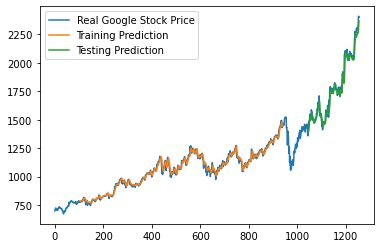

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=105
trainPredictPlot = numpy.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset1), label = 'Real Google Stock Price')
plt.plot(trainPredictPlot, label = 'Training Prediction')
plt.plot(testPredictPlot, label = 'Testing Prediction')
plt.legend()
plt.show()

In [31]:
len(test_set)

315

In [32]:
x_input=test_set[210:].reshape(1,-1)
x_input.shape

(1, 105)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

### Prediction for next 20 days

In [34]:
from numpy import array

lst_output=[]
n_steps=105
i=0
while(i<20):
    
    if(len(temp_input)>105):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9898373]
106
1 day input [0.64800814 0.66290468 0.6631979  0.66002426 0.65490735 0.65600547
 0.63173751 0.62786245 0.63472717 0.62864436 0.6335083  0.63099584
 0.62275704 0.59937447 0.61140209 0.60776851 0.6117298  0.62129383
 0.64208057 0.62725877 0.61197128 0.62468882 0.60598046 0.59311919
 0.61463897 0.64218981 0.64109168 0.62260756 0.61378807 0.62243508
 0.61356384 0.62164742 0.66718794 0.70544405 0.7041102  0.7184778
 0.70017765 0.69654982 0.67436312 0.67564522 0.67989973 0.71956443
 0.8060575  0.80369453 0.8043327  0.82497858 0.80924264 0.81825186
 0.82129901 0.81597512 0.82408744 0.82158072 0.82755429 0.8326597
 0.8026079  0.77846642 0.78813681 0.80286662 0.79313299 0.79658259
 0.80789154 0.80272864 0.77752353 0.8061265  0.8222304  0.8043327
 0.80534459 0.80666693 0.81295671 0.79990571 0.80950136 0.80779956
 0.7991583  0.7882633  0.78814256 0.79381141 0.80167076 0.78985011
 0.78642926 0.78011648 0.79722077 0.79807742 0.82040211 0.85201773
 0.89201014 0.89409715 0.92389598 0.9

 0.92135233 0.91114593 0.9029634 ]
9 day output [[0.89683896]]
10 day input [0.62864436 0.6335083  0.63099584 0.62275704 0.59937447 0.61140209
 0.60776851 0.6117298  0.62129383 0.64208057 0.62725877 0.61197128
 0.62468882 0.60598046 0.59311919 0.61463897 0.64218981 0.64109168
 0.62260756 0.61378807 0.62243508 0.61356384 0.62164742 0.66718794
 0.70544405 0.7041102  0.7184778  0.70017765 0.69654982 0.67436312
 0.67564522 0.67989973 0.71956443 0.8060575  0.80369453 0.8043327
 0.82497858 0.80924264 0.81825186 0.82129901 0.81597512 0.82408744
 0.82158072 0.82755429 0.8326597  0.8026079  0.77846642 0.78813681
 0.80286662 0.79313299 0.79658259 0.80789154 0.80272864 0.77752353
 0.8061265  0.8222304  0.8043327  0.80534459 0.80666693 0.81295671
 0.79990571 0.80950136 0.80779956 0.7991583  0.7882633  0.78814256
 0.79381141 0.80167076 0.78985011 0.78642926 0.78011648 0.79722077
 0.79807742 0.82040211 0.85201773 0.89201014 0.89409715 0.92389598
 0.91167289 0.91716351 0.91441532 0.92228617 0.9233325

 0.88769126 0.88741863 0.88681614]
17 day output [[0.8856489]]
18 day input [0.62129383 0.64208057 0.62725877 0.61197128 0.62468882 0.60598046
 0.59311919 0.61463897 0.64218981 0.64109168 0.62260756 0.61378807
 0.62243508 0.61356384 0.62164742 0.66718794 0.70544405 0.7041102
 0.7184778  0.70017765 0.69654982 0.67436312 0.67564522 0.67989973
 0.71956443 0.8060575  0.80369453 0.8043327  0.82497858 0.80924264
 0.81825186 0.82129901 0.81597512 0.82408744 0.82158072 0.82755429
 0.8326597  0.8026079  0.77846642 0.78813681 0.80286662 0.79313299
 0.79658259 0.80789154 0.80272864 0.77752353 0.8061265  0.8222304
 0.8043327  0.80534459 0.80666693 0.81295671 0.79990571 0.80950136
 0.80779956 0.7991583  0.7882633  0.78814256 0.79381141 0.80167076
 0.78985011 0.78642926 0.78011648 0.79722077 0.79807742 0.82040211
 0.85201773 0.89201014 0.89409715 0.92389598 0.91167289 0.91716351
 0.91441532 0.92228617 0.92333255 0.93829233 0.93195656 0.94110376
 0.92808725 0.93267523 0.92706387 0.94802596 0.95726515

In [35]:
day_new=np.arange(1,106)
day_pred=np.arange(106,126)

In [36]:
len(dataset1)

1257

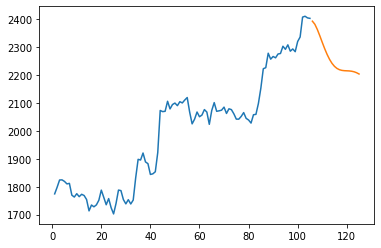

In [37]:
plt.plot(day_new,scaler.inverse_transform(dataset1[1152:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

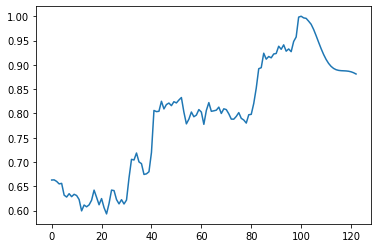

In [38]:
df3=dataset1.tolist()
df3.extend(lst_output)
plt.plot(df3[1154:])

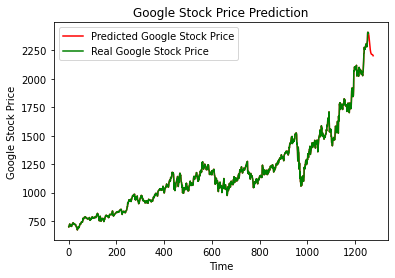

In [39]:
plt.plot(scaler.inverse_transform(df3).tolist(), color = 'red', label = 'Predicted Google Stock Price')
plt.plot(scaler.inverse_transform(dataset1), color = 'green', label = 'Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()